In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

/Users/anuragmakineni/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
#### INPUTS ####

## MASS ##
boat_empty_mass = 20.0 # kg
payload_mass = np.linspace(20.0, 20.0, 1) # kg

## DIMENSIONS ##
boat_width = 0.5 # m
boat_length = 1.5 # m

## PERFORMANCE ##
velocity = np.linspace(0.5, 4.0, 50) # m / s
max_range = 30.0 * 1000.0 # m

## MISC ##
water_density = 1000.0 # kg / m^3
c_d = 1.28 # ul (Flat Plate: https://www.grc.nasa.gov/www/k-12/airplane/shaped.html)
battery_energy_density = 250.0 # Wh / kg

efficiency = 0.93

<IPython.core.display.Javascript object>


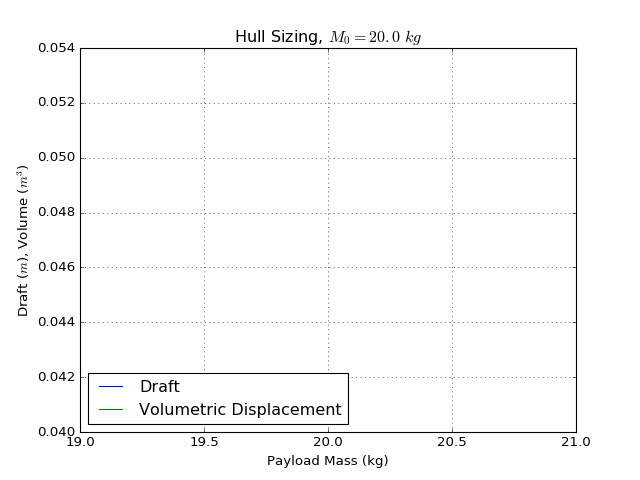

In [4]:
#### Hull Size Calculation ####
total_mass = boat_empty_mass + payload_mass
displaced_volume = total_mass / water_density

boat_area = boat_width * boat_length
draft = displaced_volume / boat_area

plt.figure(figsize=(8,6))
plt.plot(payload_mass, draft)
plt.plot(payload_mass, displaced_volume)
plt.xlabel(r'Payload Mass (kg)')
plt.ylabel(r'Draft ($m$), Volume ($m^3$)')
plt.title(r'Hull Sizing, $M_0 = ' + str(20.0) + '\ kg$')
plt.legend(['Draft', 'Volumetric Displacement'], loc=0)
plt.grid(1)
plt.savefig('hull_size.png')
plt.show()

<IPython.core.display.Javascript object>


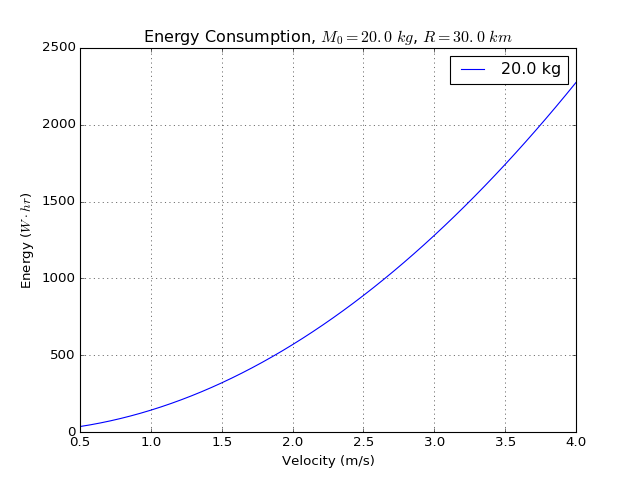

<IPython.core.display.Javascript object>


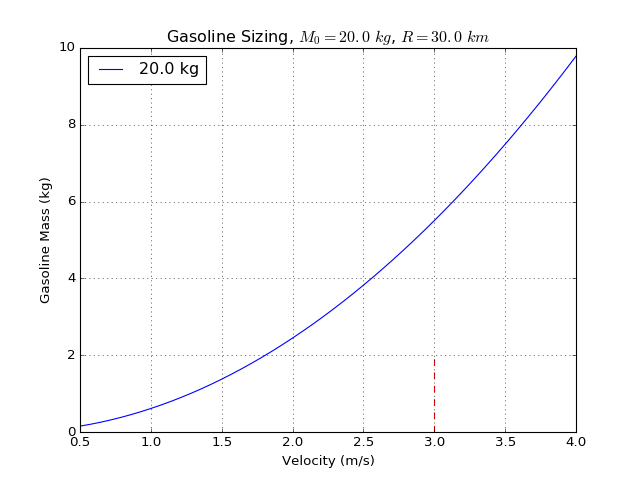

In [5]:
#### Power Consumption Calculation ####
frontal_area = draft * boat_width

plt.figure(figsize=(8,6))
for i in range(0, len(frontal_area)):
    A = frontal_area[i]
    drag_force = 0.5 * c_d * water_density * velocity**2 * A
    power = drag_force * velocity
    energy = power * (max_range / velocity) / 3600.0 # W-h
    plt.plot(velocity, energy, label=str(payload_mass[i]) + ' kg')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Energy ($W \cdot hr$)')
plt.title(r'Energy Consumption, $M_0 = ' + str(boat_empty_mass) + '\ kg$, $R = ' + str(max_range/1000.0) + '\ km$')
plt.legend(loc=0)
plt.grid(1)
plt.savefig('energy.png')
#### Battery Mass Calculation ####
frontal_area = draft * boat_width
plt.figure(figsize=(8,6))
for i in range(0, len(frontal_area)):
    A = frontal_area[i]
    drag_force = 0.5 * c_d * water_density * velocity**2 * A
    power = drag_force * velocity
    energy = power * (max_range / velocity) / 3600.0# W-h 
    battery_mass = energy / efficiency / battery_energy_density
    plt.plot(velocity, battery_mass, label=str(payload_mass[i]) + ' kg')
    plt.plot([3.0, 3.0], [0.0, 2.0], 'r--')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Gasoline Mass (kg)')
plt.title(r'Gasoline Sizing, $M_0 = ' + str(20.0) + '\ kg$, $R = ' + str(max_range/1000.0) + '\ km$')

plt.legend(loc=0)
plt.grid(1)
plt.savefig('gasoline.png')
plt.show()

[   57.6           63.67973435    70.17290188    77.09310236    84.45393558
    92.26900129   100.55189929   109.31622935   118.57559124   128.34358473
   138.63380961   149.45986565   160.83535262   172.7738703    185.28901846
   198.39439689   212.10360536   226.43024363   241.3879115    256.99020873
   273.2507351    290.18309038   307.80087435   326.11768679   345.14712747
   364.90279617   385.39829266   406.64721672   428.66316812   451.45974665
   475.05055207   499.44918416   524.66924269   550.72432745   577.6280382
   605.39397473   634.03573681   663.56692421   694.00113671   725.35197409
   757.63303612   790.85792258   825.04023324   860.19356787   896.33152626
   933.46770818   971.61571341  1010.78914171  1051.00159287  1092.26666667]


<IPython.core.display.Javascript object>


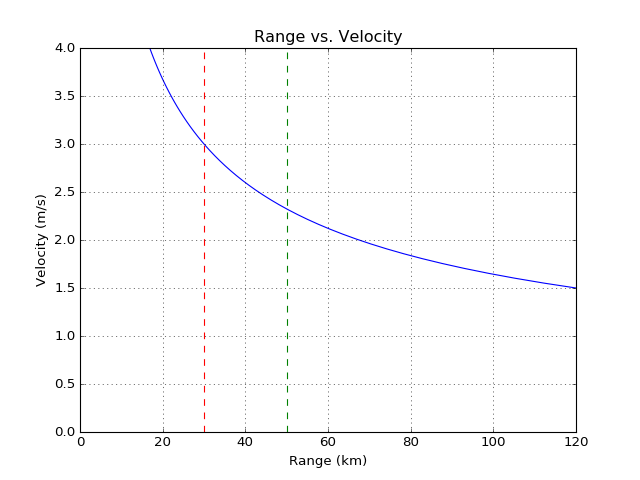

In [6]:
battery_mass = 5.12
velocity = np.linspace(1.5, 4.0, 50) # m / s

energy_available = battery_mass * battery_energy_density * 3600.0
A = frontal_area[0]
drag_force = 0.5 * c_d * water_density * velocity**2 * A
power = drag_force * velocity
print power

drain_time = energy_available / power
distance = drain_time * velocity / 1000.0


plt.figure()
plt.plot(distance, velocity)
plt.plot([30.0, 30.0], [0.0, 4.0], 'r--')
plt.plot([50.0, 50.0], [0.0, 4.0], 'g--')
plt.grid(1)
plt.xlabel('Range (km)')
plt.ylabel('Velocity (m/s)')
plt.title('Range vs. Velocity')
plt.savefig('range_vs_velocity.png')
plt.show()